In [25]:
import cv2
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

In [26]:
# Find template 2D
def find_template_2D(template, img):
    # TODO: Find template in img and return [y x] location. 
    # Make sure this location is the top-left corner of the match.
    # Use scipy.signal.correlate2d
    t_y, t_x = template.shape[0], template.shape[1]
    correlation = sp.correlate2d(img, template, mode='same')
    y, x = np.unravel_index(np.argmax(correlation), correlation.shape)
    return y - (t_y // 2), x - (t_x // 2)

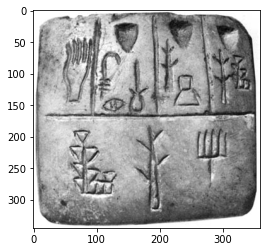

In [37]:
tablet = cv2.imread('images/tablet.png', 0)
colored_tablet = cv2.imread('images/tablet.png')
plt.imshow(tablet, cmap='binary_r')

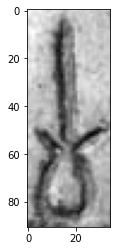

In [34]:
glyph = tablet[74:165, 149:184]
plt.imshow(glyph, cmap='binary_r')

In [35]:
tablet_2 = 1. * tablet - np.mean(tablet)
glyph_2 = 1. * glyph - np.mean(glyph)

y, x = find_template_2D(glyph_2, tablet_2)
print("Y: {}, X: {}".format(y, x))

Y: 74, X: 149


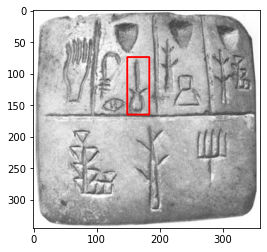

In [38]:
start_point = (x, y)
end_point = (x + glyph_2.shape[1], y + glyph_2.shape[0])

result = cv2.rectangle(colored_tablet, start_point, end_point, (255, 0, 0), 2)
plt.imshow(result)